In [45]:
import pandas as pd

In [48]:
cook = pd.read_json('~/Desktop/merge json.json')

In [49]:
cook['num_ingredients'] = cook['ingredients'].apply(len)

In [50]:
cook.head(5)

,cuisine,id,ingredients,num_ingredients
0,chinese,0,"[mince, cloves, grated fresh root ginger, onio...",22
1,chinese,1,"[fresh wide noodles, water, eggplants, peanut ...",17
2,chinese,2,"[fresh wide noodles, water, eggplants, peanut ...",17
3,chinese,3,"[mince pork , hot bean paste, sweet bean paste...",13
4,chinese,4,"[long-grain white rice, vegetable or peanut oi...",10


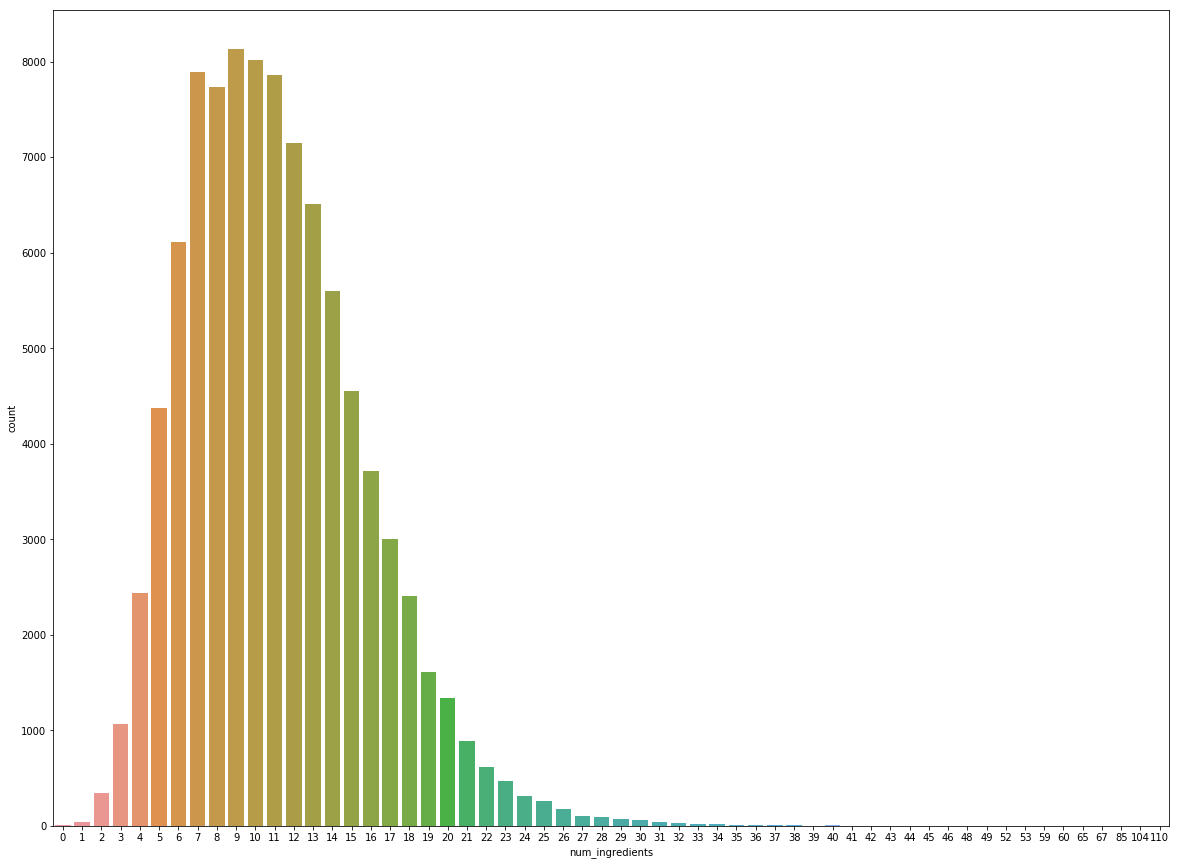

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.countplot(cook.num_ingredients)

In [52]:
cook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93127 entries, 0 to 93126
Data columns (total 4 columns):
cuisine            93127 non-null object
id                 93127 non-null int64
ingredients        93127 non-null object
num_ingredients    93127 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


Remove #ingredients = 1 and #ingredients >25

In [53]:
a=cook[cook['num_ingredients']<=25]

In [54]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92458 entries, 0 to 93126
Data columns (total 4 columns):
cuisine            92458 non-null object
id                 92458 non-null int64
ingredients        92458 non-null object
num_ingredients    92458 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


In [55]:
a1 = a[a['num_ingredients']>=2]

In [56]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92412 entries, 0 to 93126
Data columns (total 4 columns):
cuisine            92412 non-null object
id                 92412 non-null int64
ingredients        92412 non-null object
num_ingredients    92412 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


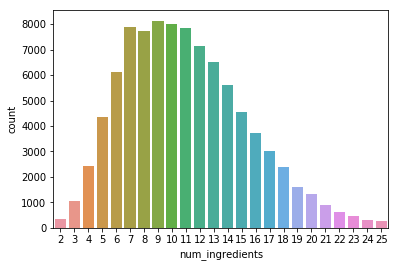

In [58]:
sns.countplot(a1.num_ingredients)

WordCount of ingredients for all Cuisine

In [59]:
import collections

In [60]:
#top 15 ingredients for all cuisine
count = collections.Counter([ingred for ingredients in cook.ingredients for ingred in ingredients])
wordcount = count.most_common(15)
wordcount

[('salt', 38307),
 ('garlic', 19899),
 ('olive oil', 18661),
 ('water', 15286),
 ('onions', 15179),
 ('sugar', 13196),
 ('garlic cloves', 11350),
 ('pepper', 10460),
 ('butter', 9539),
 ('eggs', 9217),
 ('vegetable oil', 8939),
 ('soy sauce', 8587),
 ('kosher salt', 8108),
 ('ground black pepper', 7827),
 ('all-purpose flour', 7642)]

Text(0.5,1,'Top 15 most common ingredients')

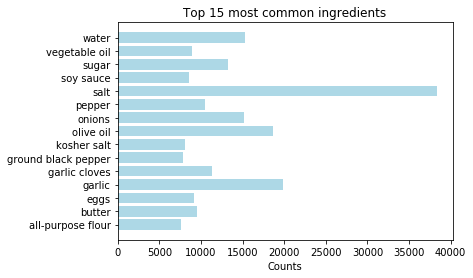

In [62]:
WCData=pd.DataFrame(wordcount)
plt.barh(WCData[0],WCData[1],color="lightblue")
plt.xlabel("Counts")
plt.title("Top 15 most common ingredients")

worldcloud of the top 15 ingredients for each cuisine

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
cook["ingredients_list"] = cook["ingredients"].apply(lambda ingredients: ", ".join(ingredients))

In [65]:
cook.head(5)

,cuisine,id,ingredients,num_ingredients,ingredients_list
0,chinese,0,"[mince, cloves, grated fresh root ginger, onio...",22,"mince, cloves, grated fresh root ginger, onion..."
1,chinese,1,"[fresh wide noodles, water, eggplants, peanut ...",17,"fresh wide noodles, water, eggplants, peanut o..."
2,chinese,2,"[fresh wide noodles, water, eggplants, peanut ...",17,"fresh wide noodles, water, eggplants, peanut o..."
3,chinese,3,"[mince pork , hot bean paste, sweet bean paste...",13,"mince pork , hot bean paste, sweet bean paste,..."
4,chinese,4,"[long-grain white rice, vegetable or peanut oi...",10,"long-grain white rice, vegetable or peanut oil..."


In [66]:
x = cook.ingredients_list

In [67]:
v = CountVectorizer(tokenizer=lambda ingredients: ingredients.split(", "),lowercase = True)
v

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x119581950>, vocabulary=None)

In [68]:
transform_x = v.fit_transform(x)
transform_x

<93127x37544 sparse matrix of type '<class 'numpy.int64'>'
	with 1025581 stored elements in Compressed Sparse Row format>

In [69]:
cook_new = pd.SparseDataFrame(transform_x, columns = v.get_feature_names(), default_fill_value = 0)

In [71]:
cook_new["cuisine"] = cook["cuisine"]
cook_new.head(5)

,,lb pastrami cubed,lb provolone cheese cubed,lb salami cubed,lb. fresh mozzarella,tsp black pepper,tsp ground black pepper,tsp salt,yellow onion,1 green roasted bell pepper diced,...,~2 tablespoons worcestershire sauce,"~2"" piece ginger",~3 lb boneless pork loin,~300g mixed fish,~300g plain flour,~35 ounces tomato or pasta sauce,~5 cups cooked long-grain white rice (yeah,~5 cups water,~6 slices pickled jalapeos,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese


In [72]:
cook_group = cook_new.groupby("cuisine")
cook_groupcount = cook_group.agg(np.sum)

In [73]:
cook_groupcount.head(20)

,,lb pastrami cubed,lb provolone cheese cubed,lb salami cubed,lb. fresh mozzarella,tsp black pepper,tsp ground black pepper,tsp salt,yellow onion,1 green roasted bell pepper diced,...,~2 tablespoons soy sauce,~2 tablespoons worcestershire sauce,"~2"" piece ginger",~3 lb boneless pork loin,~300g mixed fish,~300g plain flour,~35 ounces tomato or pasta sauce,~5 cups cooked long-grain white rice (yeah,~5 cups water,~6 slices pickled jalapeos
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
british,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cajun_creole,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chinese,15,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
filipino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
french,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
greek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
indian,201,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
irish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
plt.rcParams["figure.figsize"] = (10, 8)
def gen_wordcloud(subset, cols):
  ingred_sum = subset.tolist()              
  sum_dict = {cols[i]: ingred_sum[i] for i in range(0, len(subset))}
    
  wordcloud = WordCloud(background_color = "white", max_words = 50).fit_words(sum_dict)
  plt.imshow(wordcloud, interpolation = "bilinear")
  plt.axis("off")

Italian

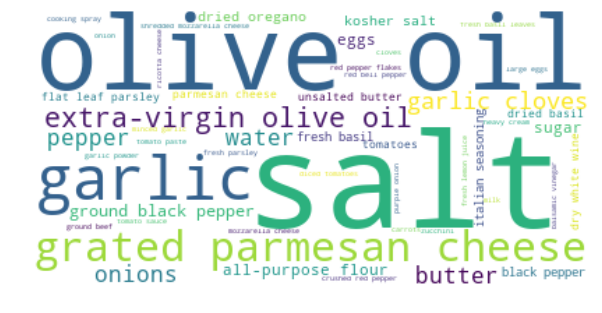

In [94]:
gen_wordcloud(cook_groupcount.iloc[9],cook_new.columns)

French

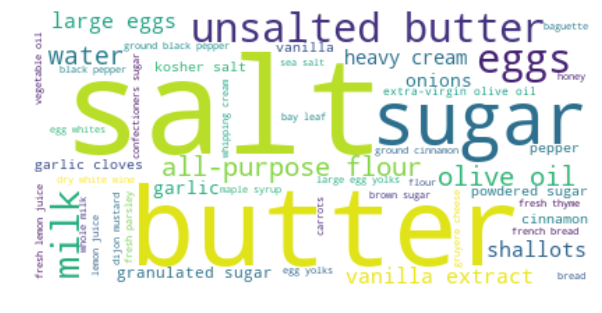

In [95]:
gen_wordcloud(cook_groupcount.iloc[5],cook_new.columns)

Chinese

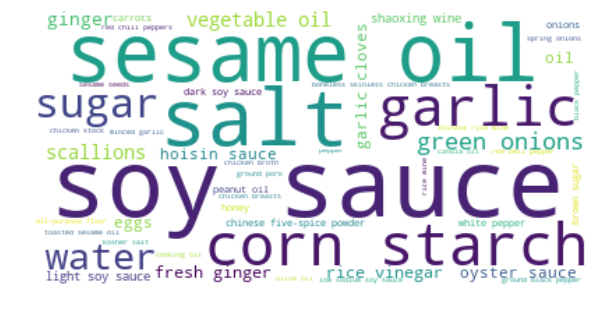

In [76]:
gen_wordcloud(cook_groupcount.iloc[3],cook_new.columns)

India

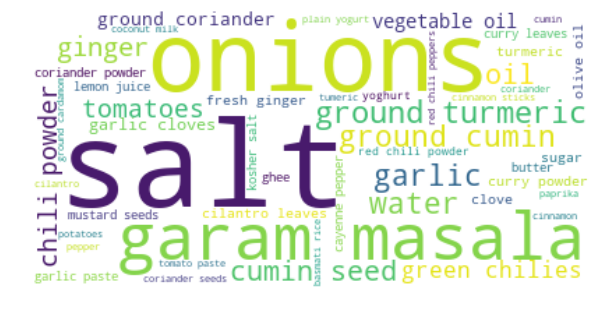

In [77]:
gen_wordcloud(cook_groupcount.iloc[7],cook_new.columns)

American

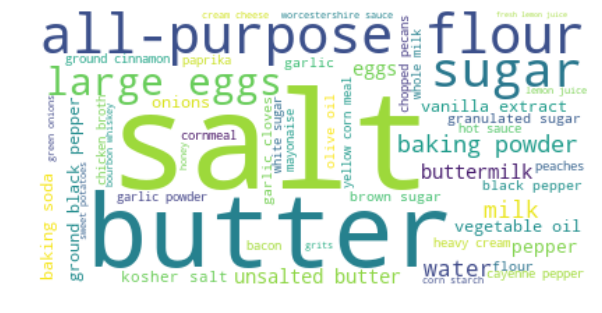

In [78]:
gen_wordcloud(cook_groupcount.iloc[16],cook_new.columns)

Greek

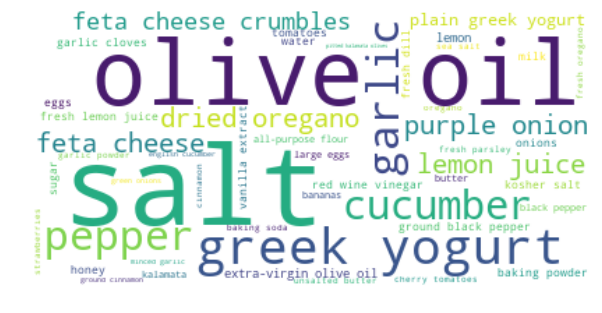

In [79]:
gen_wordcloud(cook_groupcount.iloc[6],cook_new.columns)

Network graph based on the similarity of cuisines based on common ingredients

In [80]:
from collections import defaultdict

In [81]:
#change counts to name 
ingred_name = pd.DataFrame(cook_groupcount.columns[np.argsort(-cook_groupcount.values)],index = cook_groupcount.index)
ingred_name.head()

,0,1,2,3,4,5,6,7,8,9,...,37534,37535,37536,37537,37538,37539,37540,37541,37542,37543
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes,...,dry ginger powder tsp.,dry ginger powder - pinch,dry ginger powder or fresh ginger,dry ginger powder),dry hard cider,dry italian bread crumbs,dry italian parsley or fresh parsley,dry italian red wine,dry masa harina for tamales,~6 slices pickled jalapeos
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs,...,dry marsala,dry marsala wine,dry masa harina for tamales,dry mexican or taco seasoning,dry mexican oregano mexican oregano,dry milk powder,dry mint,dry mustard powder,dry whole-wheat breadcrumbs,~6 slices pickled jalapeos
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water,...,dry white wine or dry sherry,dry white burgundy wine,dry white or red wine,dry white or red wine,dry white vermouth,dry white wine,dry white wine at room temperature,dry white wine or belgian beer,dry white cooking wine,~6 slices pickled jalapeos
chinese,soy sauce,sesame oil,salt,corn starch,garlic,sugar,water,green onions,vegetable oil,scallions,...,etwas speck,etwas wein,etwas zitronensaft,etwas zitronenschale,etwas zucker,european cucumber,european style butter,ev olive oil,etwas zimt,~6 slices pickled jalapeos
filipino,salt,garlic,onions,water,soy sauce,pepper,oil,sugar,carrots,ground black pepper,...,dry mango powder,dry mango powder or lemon juice,dry mango powder or lemon juice,dry mango powder or sumac,dry marjoram,dry marjoram,dry marsala,dry marsala,dry,~6 slices pickled jalapeos


In [82]:
ingredients = ingred_name.iloc[:,0:30]
ingredients.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes,...,red bell pepper,carrots,ice,lime juice,green onions,shrimp,cilantro,unsalted butter,bay leaf,fresh lime juice
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs,...,vegetable oil,whipping cream,olive oil,worcestershire sauce,whole milk,white sugar,ground cinnamon,raisins,brown sugar,lemon
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water,...,fresh parsley,paprika,pepper,worcestershire sauce,diced tomatoes,chicken broth,celery ribs,black pepper,hot sauce,red bell pepper
chinese,soy sauce,sesame oil,salt,corn starch,garlic,sugar,water,green onions,vegetable oil,scallions,...,onions,chinese five-spice powder,carrots,honey,peanut oil,dark soy sauce,white pepper,brown sugar,boneless skinless chicken breasts,minced garlic
filipino,salt,garlic,onions,water,soy sauce,pepper,oil,sugar,carrots,ground black pepper,...,ginger,butter,corn starch,tomatoes,potatoes,white vinegar,olive oil,ground pork,pork,white sugar


In [83]:
# find common ingredients 
ingredients_count = defaultdict(int)
for i in range(0, 20):
  for j in range(0, 30):
    ingredients_count[ingredients.iloc[i][j]] += 1

In [85]:
# use the part that common ingredients counts that larger than 10
ingredients_10 = dict((ingred, counts) for ingred, counts in ingredients_count.items() if counts >=10)
ingredients_10.keys()

dict_keys(['salt', 'onions', 'olive oil', 'water', 'garlic cloves', 'garlic', 'sugar', 'pepper', 'eggs', 'butter', 'ground black pepper', 'vegetable oil', 'carrots', 'green onions', 'kosher salt'])

In [86]:
ingred_common = cook_groupcount[list(ingredients_10.keys())]
ingred_common

,salt,onions,olive oil,water,garlic cloves,garlic,sugar,pepper,eggs,butter,ground black pepper,vegetable oil,carrots,green onions,kosher salt
cuisine,,,,,,,,,,,,,,,
brazilian,194,133,118,87,83,82,69,56,52,48,48,43,26,23,22
british,407,142,54,109,29,34,176,88,191,222,71,58,59,7,60
cajun_creole,743,529,316,280,277,370,119,189,87,334,265,245,50,256,105
chinese,2761,837,422,2076,1095,2434,2372,566,934,145,403,1730,817,1796,521
filipino,421,310,48,310,91,325,136,199,93,60,124,95,128,65,21
french,3378,755,1347,1145,615,769,1939,630,1669,2136,578,303,364,103,641
greek,2567,506,1708,464,636,1106,517,1005,620,409,596,112,113,237,500
indian,5280,3247,927,2102,1122,2161,898,583,212,670,450,1347,465,89,694
irish,376,132,50,96,31,51,120,87,90,219,66,43,105,25,33


In [87]:
ingredients_common=ingred_common.transpose()

In [88]:
ingredients_common1 = ingredients_common.rename_axis(None).rename_axis(None, axis=1)

In [89]:
corr=ingredients_common1.corr()
corr

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,1.000000,0.622539,0.858062,0.391102,0.722130,0.644981,0.808925,0.884768,0.647505,0.822291,0.854047,0.651246,0.271544,0.856378,0.859254,0.721724,0.620787,0.823496,0.429066,0.290065
british,0.622539,1.000000,0.560601,0.286270,0.485274,0.928489,0.564267,0.638275,0.946269,0.463647,0.639601,0.783149,0.043693,0.469762,0.334580,0.932193,0.954524,0.295261,0.076003,0.206771
cajun_creole,0.858062,0.560601,1.000000,0.358849,0.700782,0.509535,0.674690,0.881415,0.663580,0.667053,0.875236,0.495298,0.281067,0.854949,0.675099,0.596870,0.611165,0.680015,0.402993,0.157573
chinese,0.391102,0.286270,0.358849,1.000000,0.611472,0.306386,0.287835,0.555337,0.278887,0.175767,0.577667,0.712860,0.856664,0.465096,0.095424,0.430593,0.385587,0.159048,0.889255,0.845515
filipino,0.722130,0.485274,0.700782,0.611472,1.000000,0.383549,0.506814,0.854325,0.561079,0.432373,0.885488,0.637149,0.607792,0.714384,0.469620,0.607867,0.482115,0.483042,0.649501,0.541975
french,0.644981,0.928489,0.509535,0.306386,0.383549,1.000000,0.669658,0.555628,0.861758,0.630492,0.543316,0.780971,0.011299,0.491404,0.414149,0.830300,0.922492,0.418302,0.134892,0.229844
greek,0.808925,0.564267,0.674690,0.287835,0.506814,0.669658,1.000000,0.651229,0.583826,0.946201,0.698334,0.680368,0.077852,0.871381,0.762833,0.520565,0.608219,0.885717,0.357606,0.149085
indian,0.884768,0.638275,0.881415,0.555337,0.854325,0.555628,0.651229,1.000000,0.702060,0.610216,0.941897,0.685027,0.431331,0.866100,0.674292,0.743768,0.653598,0.663081,0.562373,0.446348
irish,0.647505,0.946269,0.663580,0.278887,0.561079,0.861758,0.583826,0.702060,1.000000,0.501534,0.715216,0.710953,0.092903,0.538634,0.425704,0.899449,0.934026,0.340165,0.148816,0.242316
italian,0.822291,0.463647,0.667053,0.175767,0.432373,0.630492,0.946201,0.610216,0.501534,1.000000,0.593572,0.528754,-0.022614,0.826307,0.858491,0.430914,0.500519,0.930155,0.304922,0.080425


In [90]:
corr1=corr.stack().reset_index()
corr1.head(5)

,level_0,level_1,0
0,brazilian,brazilian,1.000000
1,brazilian,british,0.622539
2,brazilian,cajun_creole,0.858062
3,brazilian,chinese,0.391102
4,brazilian,filipino,0.722130


In [91]:
corr1.columns = ["cuisine1","cuisine2","correlation"]
corr2 = corr1.loc[corr1["correlation"]!= 1]
corr3 =corr2.loc[corr2["correlation"]>0.5]
corr3.head()

,cuisine1,cuisine2,correlation
1,brazilian,british,0.622539
2,brazilian,cajun_creole,0.858062
4,brazilian,filipino,0.722130
5,brazilian,french,0.644981
6,brazilian,greek,0.808925


In [92]:
import networkx as nx
graph = nx.from_pandas_edgelist(corr3,"cuisine1","cuisine2",)

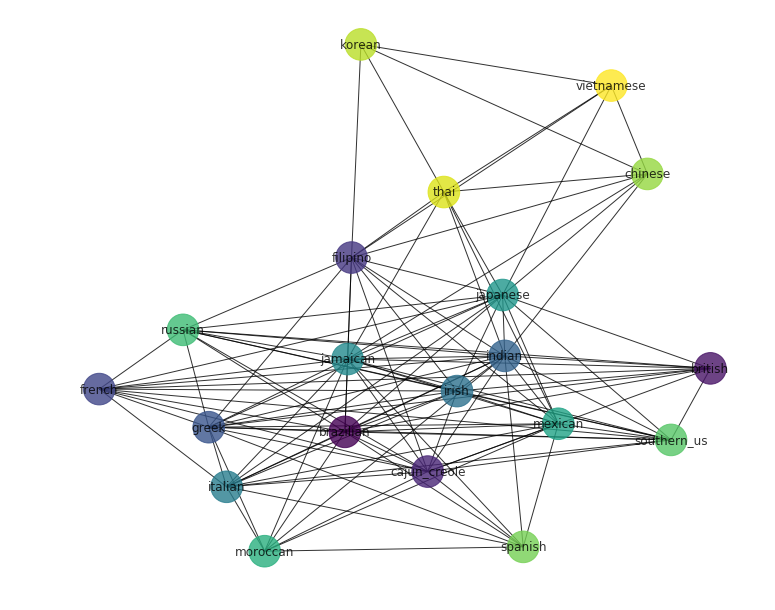

In [93]:
nx.draw(graph, node_color= range(20),node_size=1000, alpha = 0.8, with_labels=True)